# Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

from collections import Counter

from wordcloud import WordCloud

# Load Dataset

In [ ]:
newsgroups_data = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'))

df = pd.DataFrame({
    'text':newsgroups_data.data,
    'category':newsgroups_data.target
})

df['category_name'] = df['category'].apply(lambda x: newsgroups_data.target_names[x])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           11314 non-null  object
 1   category       11314 non-null  int64 
 2   category_name  11314 non-null  object
dtypes: int64(1), object(2)
memory usage: 265.3+ KB
None
                                                text  ...          category_name
0  I was wondering if anyone out there could enli...  ...              rec.autos
1  A fair number of brave souls who upgraded thei...  ...  comp.sys.mac.hardware
2  well folks, my mac plus finally gave up the gh...  ...  comp.sys.mac.hardware
3  \nDo you have Weitek's address/phone number?  ...  ...          comp.graphics
4  From article <C5owCB.n3p@world.std.com>, by to...  ...              sci.space

[5 rows x 3 columns]


In [6]:
df.head()

text  ...          category_name
0  I was wondering if anyone out there could enli...  ...              rec.autos
1  A fair number of brave souls who upgraded thei...  ...  comp.sys.mac.hardware
2  well folks, my mac plus finally gave up the gh...  ...  comp.sys.mac.hardware
3  \nDo you have Weitek's address/phone number?  ...  ...          comp.graphics
4  From article <C5owCB.n3p@world.std.com>, by to...  ...              sci.space

[5 rows x 3 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           11314 non-null  object
 1   category       11314 non-null  int64 
 2   category_name  11314 non-null  object
dtypes: int64(1), object(2)
memory usage: 265.3+ KB


In [10]:
duplicates = df.duplicated(subset=['text']).sum()
print (f"number of duplicate rows: {duplicates}")

df = df.drop_duplicates(subset=['text'], keep='first').reset_index(drop=True)
print (f"Number of duplicate rows after removal: {df.duplicated(subset=['text']).sum()}")

number of duplicate rows: 320
Number of duplicate rows after removal: 0


In [13]:
df['category_name'].value_counts()

category_name
soc.religion.christian      592
rec.sport.hockey            585
sci.crypt                   582
rec.motorcycles             581
comp.windows.x              581
sci.med                     577
comp.sys.ibm.pc.hardware    577
sci.space                   576
rec.sport.baseball          575
sci.electronics             573
misc.forsale                572
comp.graphics               569
comp.os.ms-windows.misc     567
rec.autos                   563
comp.sys.mac.hardware       558
talk.politics.mideast       549
talk.politics.guns          533
alt.atheism                 469
talk.politics.misc          453
talk.religion.misc          361
Name: count, dtype: int64

# Exploratory Data Analysis

count    10994.000000
mean      1251.595870
std       4091.494705
min          0.000000
25%        253.000000
50%        506.000000
75%       1009.000000
max      74878.000000
Name: text_length, dtype: float64


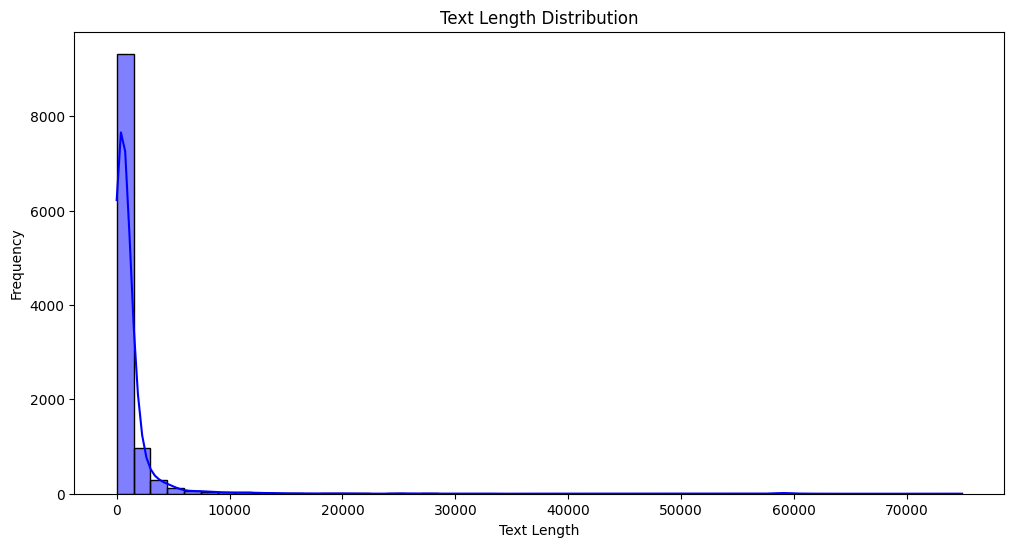

In [ ]:
# calculate text length
df['text_length'] = df['text'].apply(len)
print (df['text_length'].describe())

# plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

- **Overall Text Length** : The average text length is around 1252 characters, with a standard deviation of 4091 characters. This indicates a wider range of text lengths in our data. There are some very short texts (minimuim length is 0 characters) and some very long texts (maximum length is 74878 characters)
- **Distribution Shape** : This histogram suggests a right-skewed distribution. The majority of the texts are likely shorter than the average length, with a tail extending towards longer texts.

In [ ]:
#remove 0 characters from dataset
df = df[df['text_length'] > 0]. reset_index(drop=True)

In [15]:
print(df.columns)

Index(['text', 'category', 'category_name', 'text_length'], dtype='object')


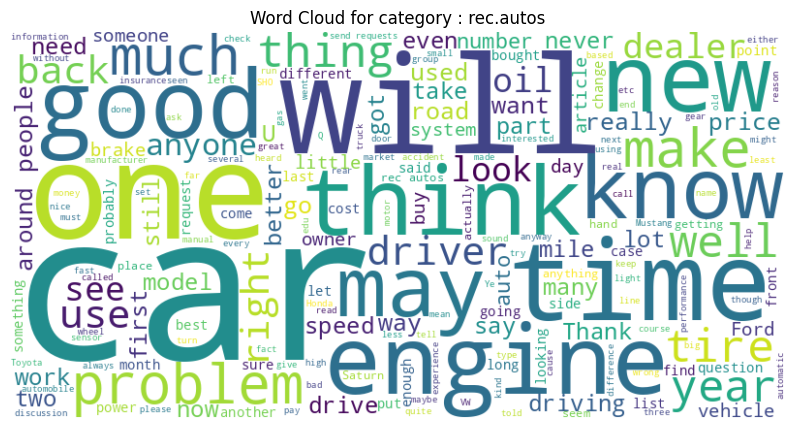

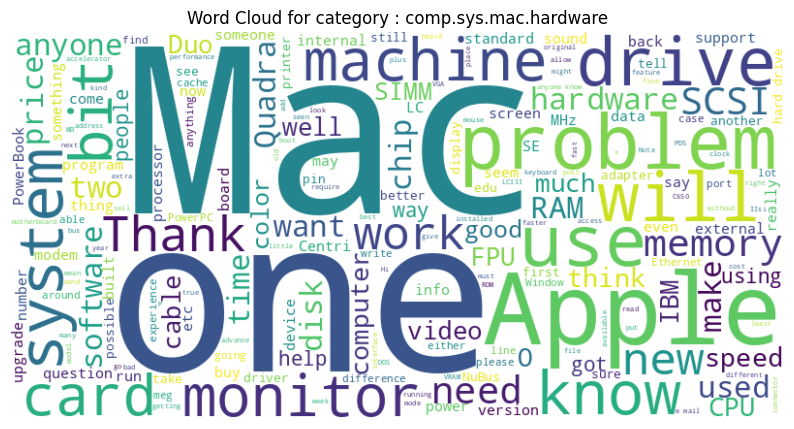

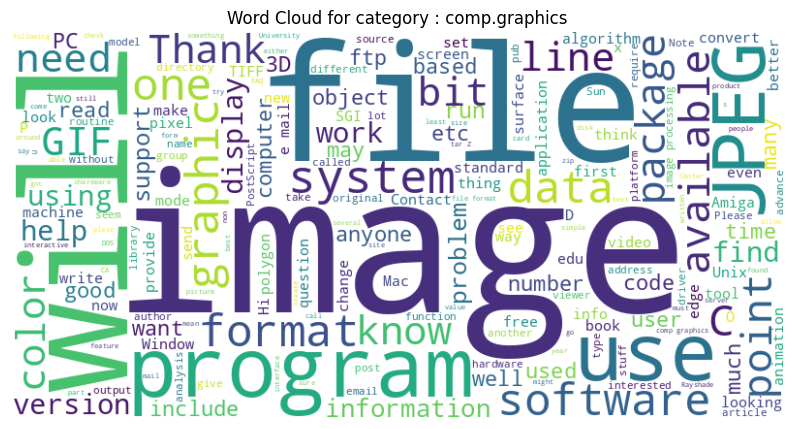

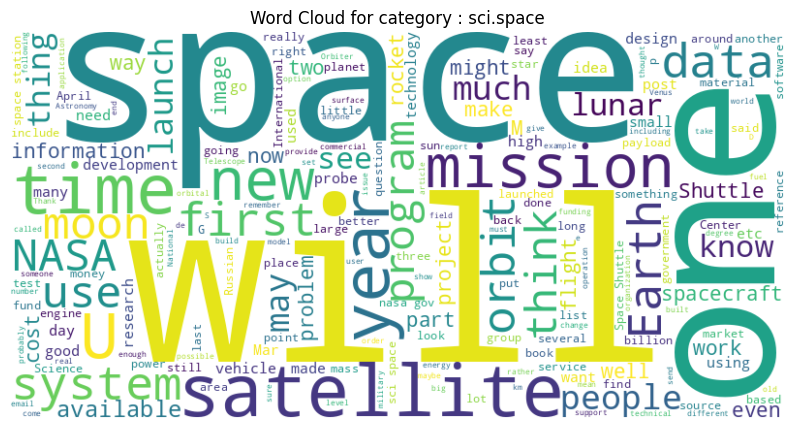

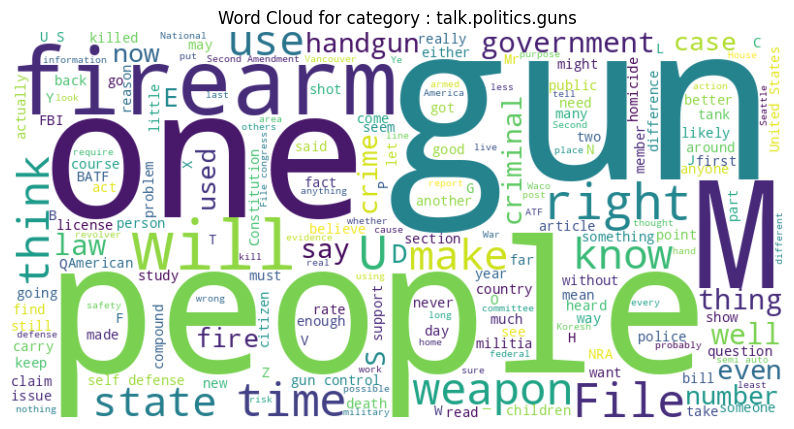

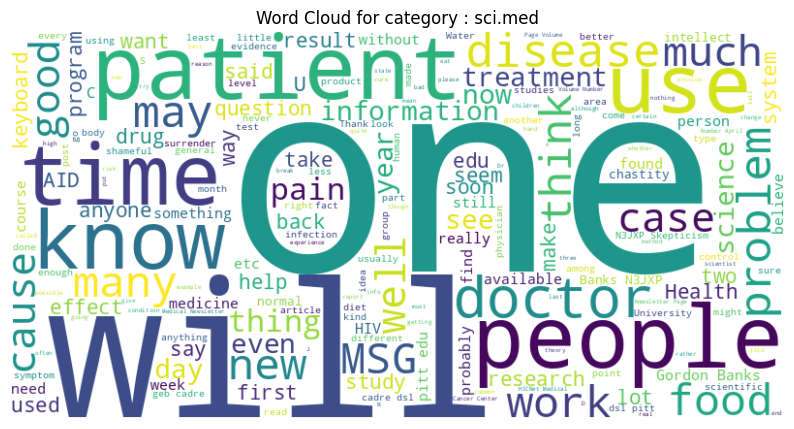

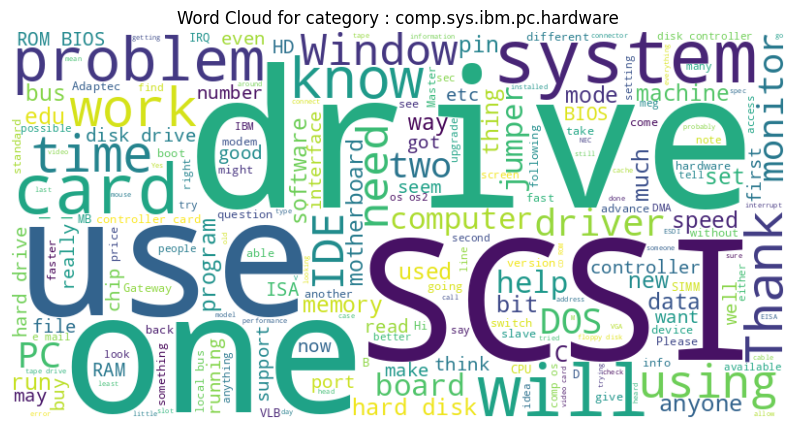

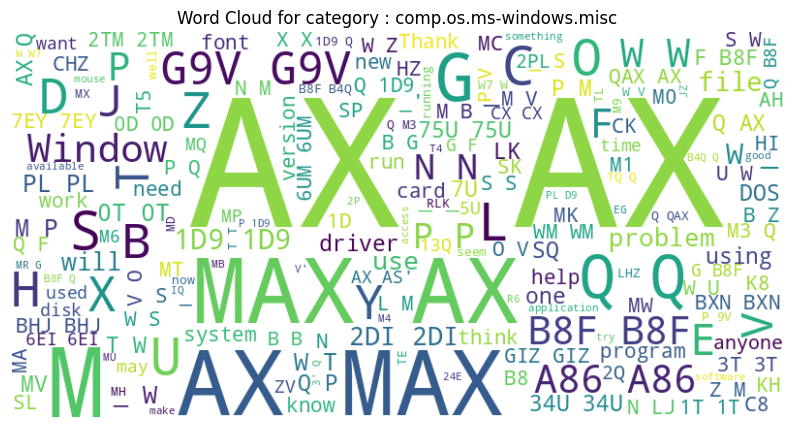

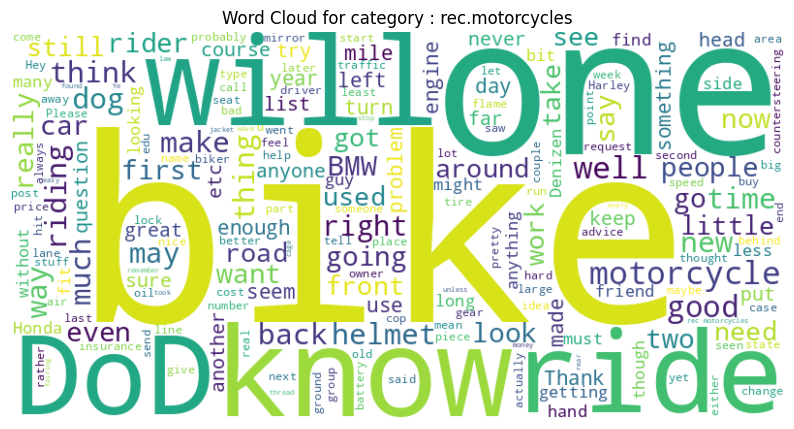

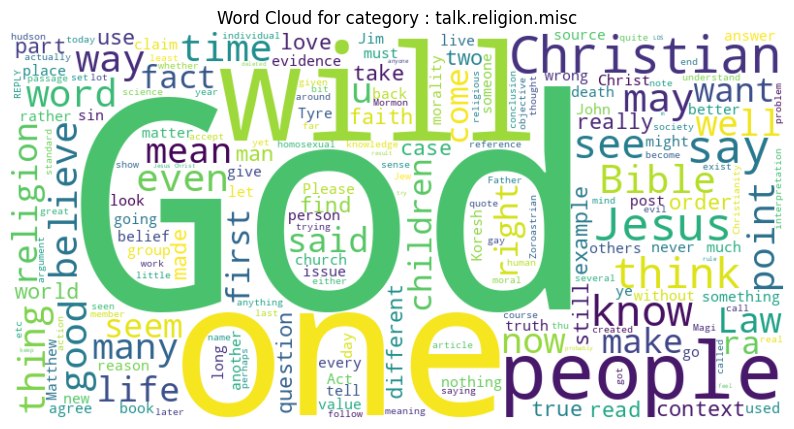

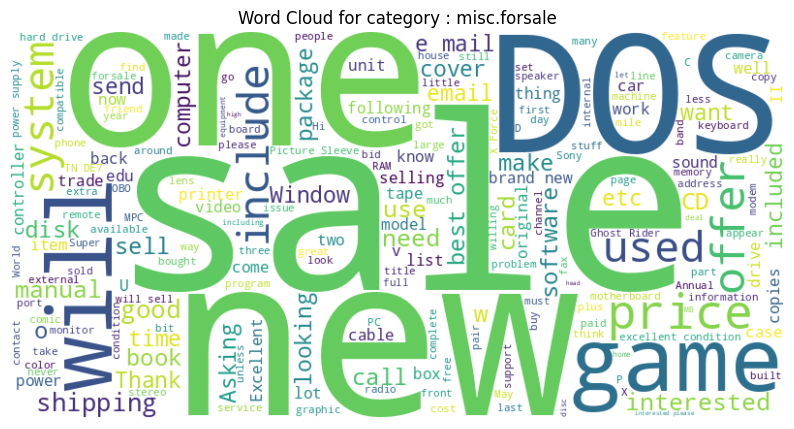

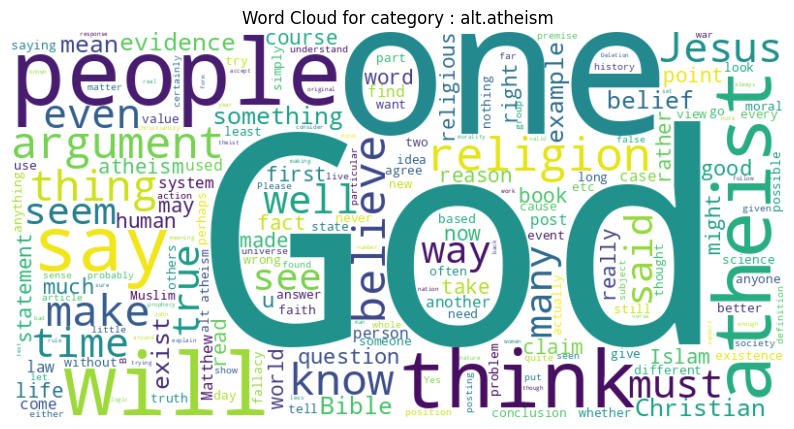

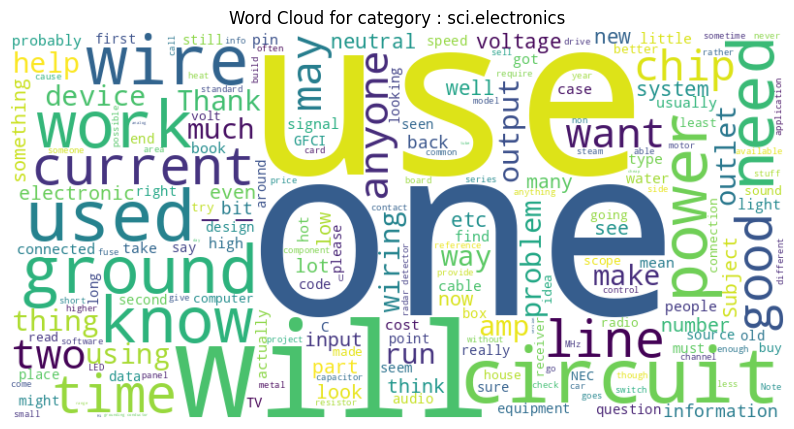

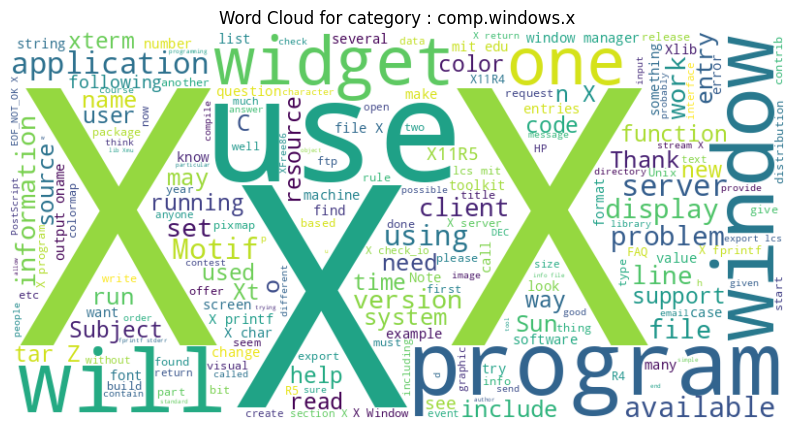

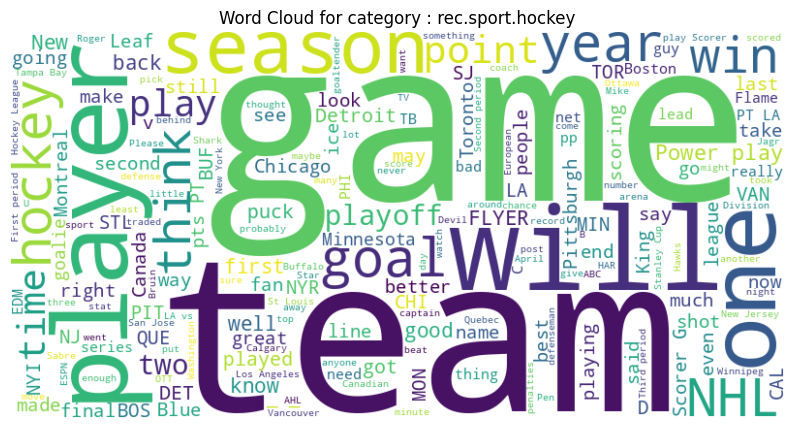

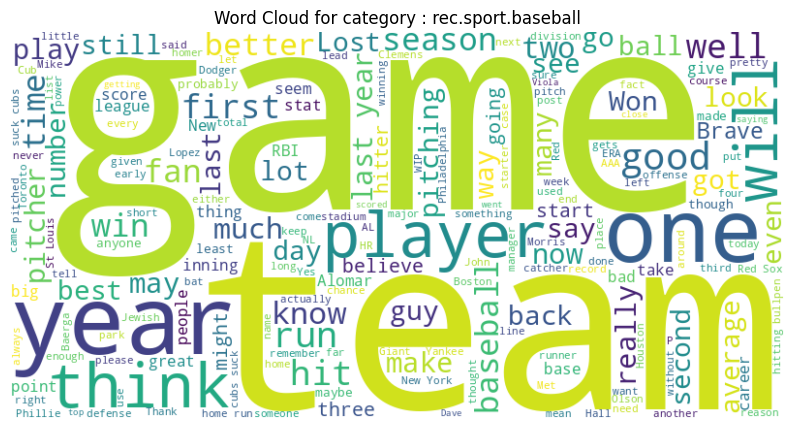

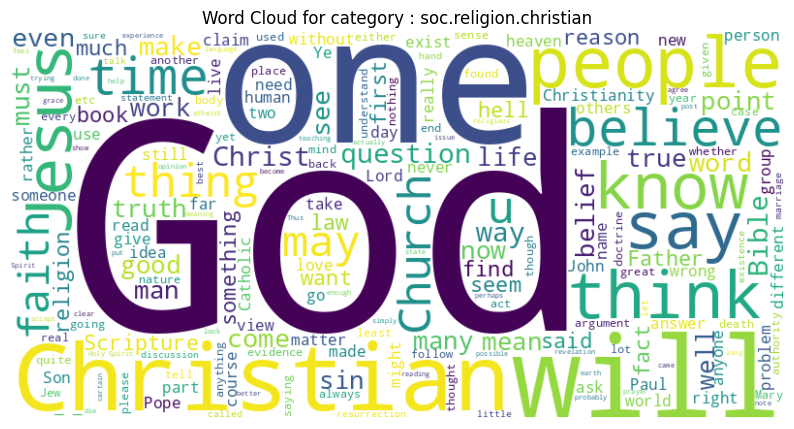

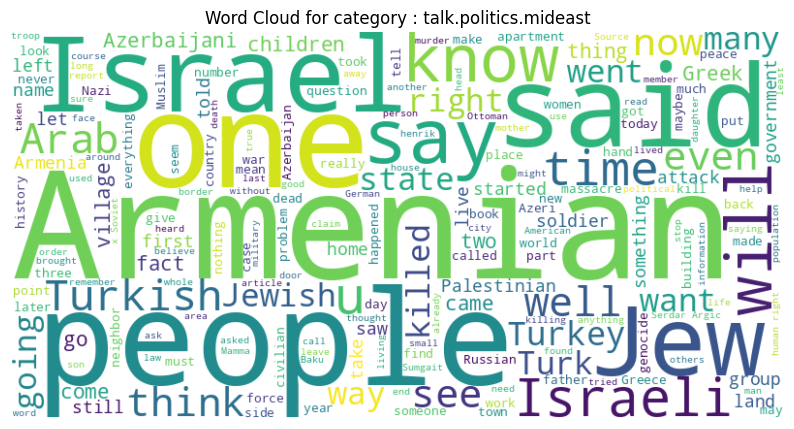

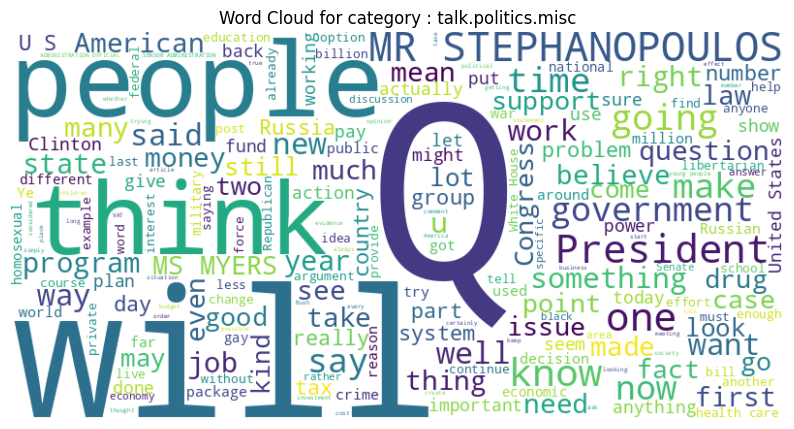

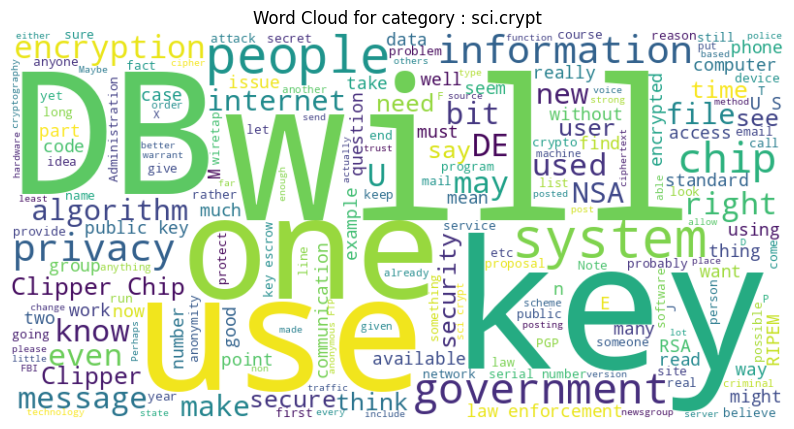

In [17]:
#Get unique categories in the dataset
categories = df['category_name'].unique()

# Wordcloud for each classes
for category in categories:
    category_text = ' '.join(df[df['category_name'] == category]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for category : {category}")
    plt.show()


### Insight

1. rec.autos:
- Focuses on discussions about cars, driving, and automotive maintenance.
- Common topics include buying and selling cars, car repairs, driving experiences, and vehicle specifications.
2. comp.sys.mac.hardware:
- Primarily centered around Apple Macintosh computers and their hardware components.
- Discussions often involve troubleshooting, hardware compatibility issues, and experiences with different hardware components.
3. comp.graphics:
- Focuses on computer graphics, image processing, and related software.
- Key topics include image formats, software tools, 3D graphics, and data visualization.
4. sci.space:
- Primarily dedicated to space exploration, astronomy, and related technologies.
- Common discussions involve space missions, satellites, rockets, planets, and NASA.
5. talk.politics.guns:
- Focuses on gun control, gun violence, and the Second Amendment.
- Discussions often center on gun laws, mass shootings, self-defense, and gun rights.
6. sci.med:
- Centers around medical science, health, and diseases.
- Common topics include medical research, patient experiences, treatments, and drug information.
7. comp.sys.ibm.pc.hardware:
- Focuses on discussions about IBM PC hardware and related components.
- Users often discuss hard drives, memory, motherboards, controllers, and DOS-related topics.
- Troubleshooting and hardware performance optimization are also frequently addressed.
8. comp.os.ms-windows.misc:
- Focuses on Microsoft Windows operating systems and related software.
- Common topics include Windows versions, software compatibility, driver issues, troubleshooting, and usage tips.
9. rec.motorcycles:
- Focuses on motorcycles, riding experiences, and motorcycle maintenance.
- Topics include motorcycle brands, models, repairs, road trips, and safety tips.
10. talk.religion.misc:
- Centers on religion, faith, and spirituality.
- Common topics include God, Jesus, the Bible, belief, faith, and morality.
11. misc.forsale:
- Focuses on buying, selling, and trading various items.
- Common topics include electronics, computer hardware, books, games, and personal items.
12. alt.atheism:
- Focuses on atheism, religion, and spirituality.
- Discussions often involve God, religion, belief, faith, and the debate between atheism and Christianity, as well as philosophical and scientific topics.
13. sci.electronics:
- Focuses on electronics and electrical engineering.
- Key topics include circuits, components, power, signals, and troubleshooting.
- Users often discuss building electronic projects and repairing electronic devices.
14. comp.windows.x:
- Focused on the X Windows system, a windowing system for Unix-like operating systems.
- Common topics include X server configuration, window managers, applications, and programming with X libraries.
15. rec.sport.hockey:
- Centers on ice hockey discussions.
- Common topics include NHL teams, players, games, scores, playoffs, strategies, and game analysis.
16. rec.sport.baseball:
- Primarily focused on baseball discussions.
- Topics include teams, players, games, scores, statistics, strategies, and game analysis.
17. soc.religion.christian:
- Focuses on discussions about Christianity and Christian beliefs.
- Topics include God, Jesus, the Bible, faith, morality, and the role of religion in daily life.
18. talk.politics.mideast:
- Primarily focused on discussions about the Middle East, particularly the Israeli-Palestinian conflict and related geopolitical issues.
- Common topics include Israel, Palestine, Arabs, Jews, war, peace, human rights, political ideologies, and international relations.
19. talk.politics.misc:
- Focused on US politics.
- Topics include government, elections, politicians, current events, social issues, and economic policies.
20. sci.crypt:
- Focuses on cryptography and security.
- Common topics include encryption, algorithms, security protocols, privacy, and the ethical implications of cryptography.
----------------------------------------------
The analyzed newsgroups exhibit a diverse range of topics, spanning technology, science, sports, politics, religion, and miscellaneous discussions:

- "comp" newsgroups (e.g., "comp.sys.mac.hardware," "comp.graphics") focus on technical discussions related to hardware, software, and computing.
- "sci" newsgroups (e.g., "sci.space," "sci.med") delve into scientific subjects, including space exploration, medicine, and electronics.
- "rec" newsgroups (e.g., "rec.sport.hockey," "rec.motorcycles") are centered around recreational interests, particularly sports and hobbies.
- "talk" newsgroups (e.g., "talk.politics.misc," "talk.religion.misc") are engaged in debates and discussions on political and religious issues.
- Miscellaneous newsgroups (e.g., "misc.forsale," "alt.atheism") cover topics ranging from classified ads to philosophical debates.  

Each of these categories reveals a unique set of topics and discussions, reflecting the broad spectrum of interests and concerns within the newsgroups.